### Import thư viện

In [2]:
# pandas
import pandas as pd
# numpy
import numpy as np
# matplotlib
import matplotlib.pyplot as plt
# seaborn
import seaborn as sns
# regex
import re 
# sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
# joblib
import joblib

### Chuẩn bị dữ liệu

#### Khám phá dữ liệu

In [3]:
# Doc du lieu voi pandas
data = pd.read_csv('Cardetails.csv')
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
data.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,8128,8128.000000,8.128000e+03,8.128000e+03,8128,8128,8128,8128,7907,7907,7913,7906,7907.000000
unique,2058,NaN,NaN,NaN,4,3,2,5,393,121,322,441,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,129,NaN,NaN,NaN,4402,6766,7078,5289,225,1017,377,530,NaN
mean,NaN,2013.804011,6.382718e+05,6.981951e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.416719
std,NaN,4.044249,8.062534e+05,5.655055e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.959588
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.800000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [6]:
# Kiem tra gia tri bi thieu
data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

#### Trực quan hóa

Selling price vs Fuel type

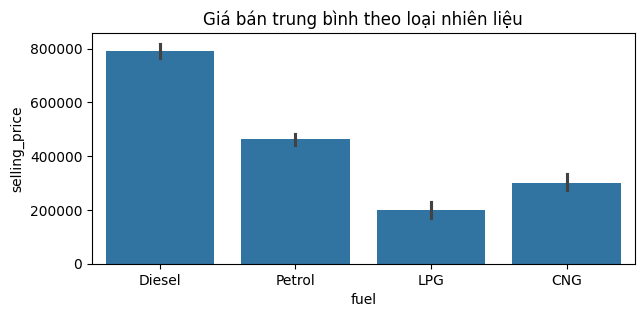

In [12]:
# Một figure với một biểu đồ (subplots)
plt.figure(figsize=(7, 3))

# Biểu đồ giá bán trung bình theo các loại nhiên liệu
sns.barplot(x='fuel', y='selling_price', data=data)

plt.title('Giá bán trung bình theo loại nhiên liệu')
plt.show()

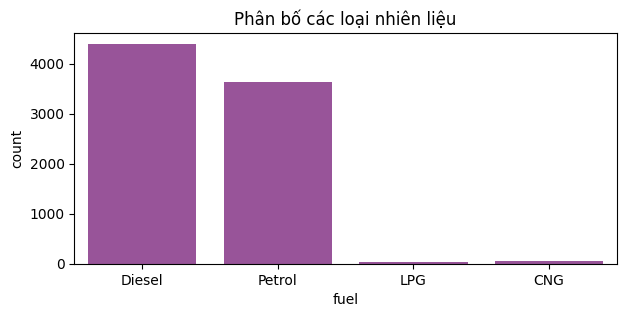

In [37]:
plt.figure(figsize=(7, 3))

# Biểu đồ đếm phân bố các loại nhiên liệu (fuel) với countplot
sns.countplot(x='fuel', data=data, color='#A349A4')

plt.title('Phân bố các loại nhiên liệu')
plt.show()

Selling price vs Transmission type

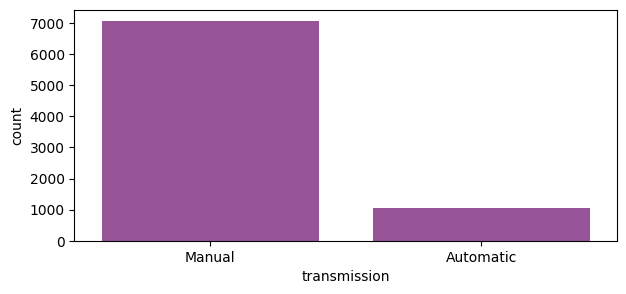

In [40]:
plt.figure(figsize=(7, 3))

sns.countplot(x='transmission', data=data, color='#A349A4')
plt.show()

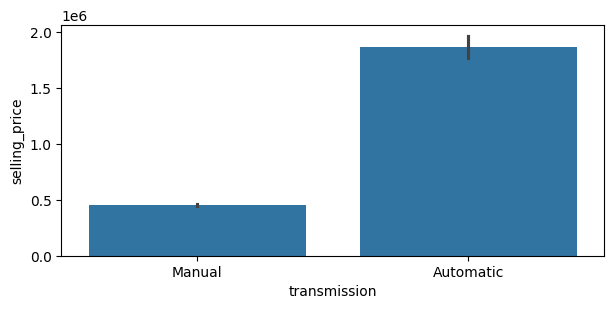

In [42]:
plt.figure(figsize=(7, 3))

sns.barplot(x='transmission', y='selling_price', data=data)
plt.show()

Selling price vs Seller type

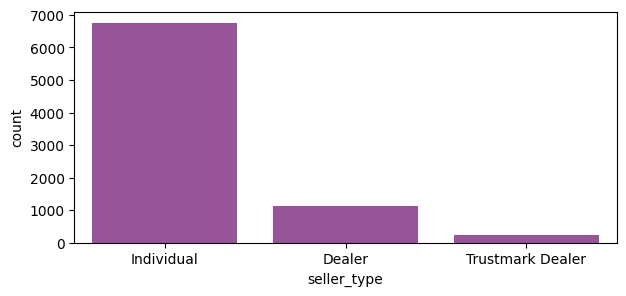

In [43]:
plt.figure(figsize=(7, 3))

sns.countplot(x='seller_type', data=data, color='#A349A4')
plt.show()

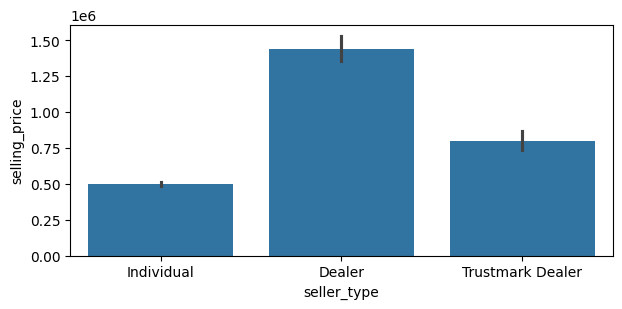

In [44]:
plt.figure(figsize=(7, 3))

sns.barplot(x='seller_type', y='selling_price', data=data)
plt.show()

Selling price vs Purchase year

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22024\1473016232.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year', data=data, palette='Set2')


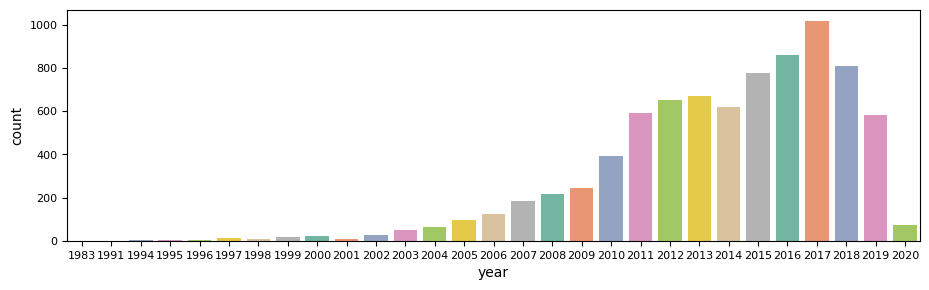

In [52]:
plt.figure(figsize=(11, 3))
sns.countplot(x='year', data=data, palette='Set2')
plt.xticks(fontsize=8) # Thay đổi font size cho trục x
plt.yticks(fontsize=8) # Thay đổi font size cho trục y

plt.show()

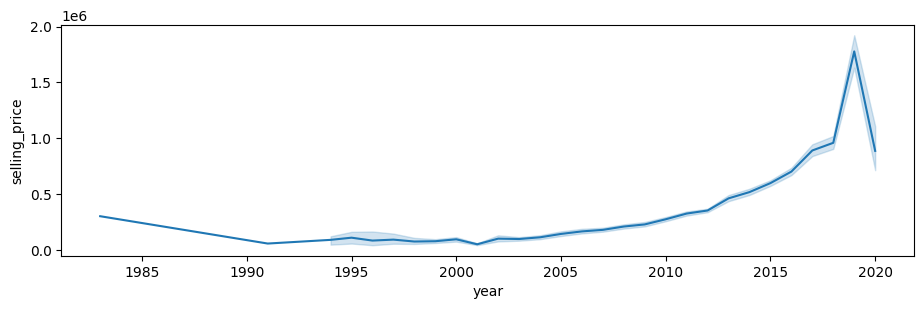

In [54]:
plt.figure(figsize=(11, 3))

sns.lineplot(x='year', y='selling_price', data=data)
plt.show()

Selling price vs Km Driven

Text(0.5, 1.0, 'Selling Price vs Km Driven in lakhs')

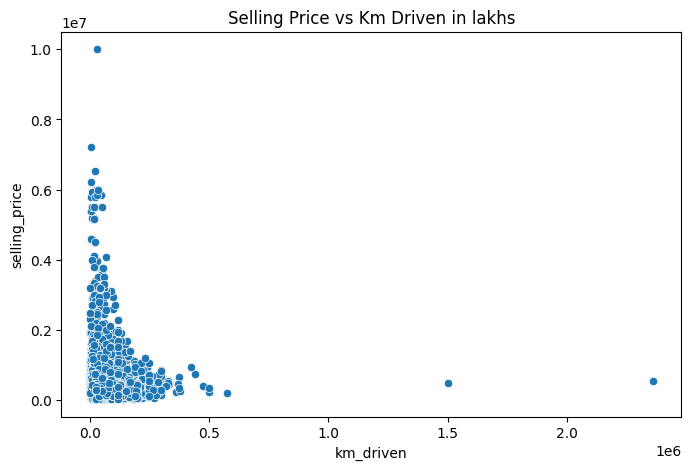

In [57]:
plt.figure(figsize = [8,5])
sns.scatterplot(x = 'km_driven', y = 'selling_price', data = data)
plt.title('Selling Price vs Km Driven in lakhs')

Selling price vs No of seats

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22024\4077274201.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='seats', data=data, palette='Set2')


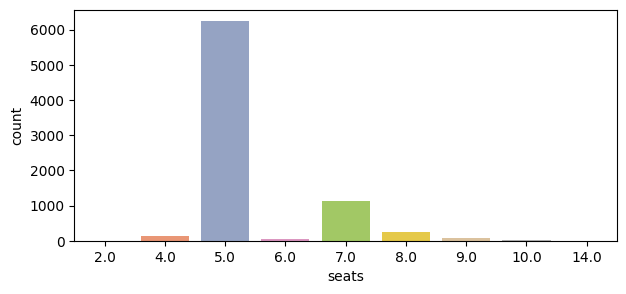

In [61]:
plt.figure(figsize=(7, 3))

sns.countplot(x='seats', data=data, palette='Set2')
plt.show()

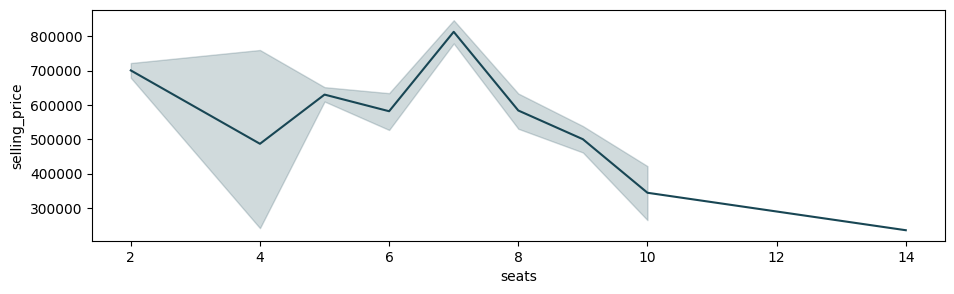

In [63]:
plt.figure(figsize=(11, 3))

sns.lineplot(x='seats', y='selling_price', data=data, color='#184654')
plt.show()

### Tiền xử lí dữ liệu

In [7]:
# Loai bo cot 'torque'
for col in data.columns:
    if col == 'torque':
        data.drop(columns=[col], inplace=True)

data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [8]:
print(data.shape)

(8128, 12)


In [9]:
# Dem so luong cac dong co gia tri 'Test Drive Car'
count = 0
for specified_col in data['owner']:
    if specified_col == 'Test Drive Car':
        count = count + 1
print(count)

# Xoa cac dong co gia tri 'Test Drive Car'
data = data[data['owner'] != 'Test Drive Car']

5


In [10]:
print(data.shape)

(8123, 12)


In [11]:
data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

In [12]:
data.dropna(inplace=True)
data.isnull().sum()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16932\752764088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [13]:
data.shape

(7902, 12)

In [14]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [15]:
# engine
z = lambda x: float(str(x).split(' ')[0])
data['engine'] = data['engine'].apply(z)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_16932\1801747377.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['engine'] = data['engine'].apply(z)


In [16]:
# fuel
z = lambda x: 0 if x == 'Diesel' else (1 if x == 'Petrol' else (2 if x == 'CNG' else 3))
data['fuel'] =data['fuel'].apply(z)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16932\3539738475.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['fuel'] =data['fuel'].apply(z)


In [17]:
# seller_type
z = lambda x: 0 if x == 'Individual' else (1 if x == 'Dealer' else 2)
data['seller_type'] = data['seller_type'].apply(z)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16932\1719940726.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['seller_type'] = data['seller_type'].apply(z)


In [18]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,0,0,Manual,First Owner,23.4 kmpl,1248.0,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,0,0,Manual,Second Owner,21.14 kmpl,1498.0,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,1,0,Manual,Third Owner,17.7 kmpl,1497.0,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,0,0,Manual,First Owner,23.0 kmpl,1396.0,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,1,0,Manual,First Owner,16.1 kmpl,1298.0,88.2 bhp,5.0


In [19]:
# transmission
z = lambda x: 0 if x == 'Manual' else 1
data['transmission'] = data['transmission'].apply(z)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16932\4291903993.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transmission'] = data['transmission'].apply(z)


In [20]:
# owner
def owner_to_numeric(x):
    if x == 'First Owner':
        return 0
    elif x == 'Second Owner':
        return 1
    elif x == 'Third Owner':
        return 2
    else:
        return 3
data['owner'] = data['owner'].apply(owner_to_numeric)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16932\3666259473.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['owner'] = data['owner'].apply(owner_to_numeric)


In [21]:
# mileage
z = lambda x: float(str(x).split(' ')[0])
data['mileage'] = data['mileage'].apply(z)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16932\787618491.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mileage'] = data['mileage'].apply(z)


In [22]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,0,0,0,0,23.40,1248.0,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,0,0,0,1,21.14,1498.0,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,1,0,0,2,17.70,1497.0,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,0,0,0,0,23.00,1396.0,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,1,0,0,0,16.10,1298.0,88.2 bhp,5.0


In [23]:
def clean_data(value):
    value = value.split(' ')[0]
    value = value.strip()
    if value == '':
        value = 0
    return float(value)

In [24]:
data['max_power'] = data['max_power'].apply(clean_data)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16932\1605680940.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['max_power'] = data['max_power'].apply(clean_data)


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7902 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7902 non-null   object 
 1   year           7902 non-null   int64  
 2   selling_price  7902 non-null   int64  
 3   km_driven      7902 non-null   int64  
 4   fuel           7902 non-null   int64  
 5   seller_type    7902 non-null   int64  
 6   transmission   7902 non-null   int64  
 7   owner          7902 non-null   int64  
 8   mileage        7902 non-null   float64
 9   engine         7902 non-null   float64
 10  max_power      7902 non-null   float64
 11  seats          7902 non-null   float64
dtypes: float64(4), int64(7), object(1)
memory usage: 802.5+ KB


In [26]:
data.drop(['name'], axis = 1, inplace = True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16932\2216770071.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['name'], axis = 1, inplace = True)


In [27]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,0,0,0,0,23.40,1248.0,74.00,5.0
1,2014,370000,120000,0,0,0,1,21.14,1498.0,103.52,5.0
2,2006,158000,140000,1,0,0,2,17.70,1497.0,78.00,5.0
3,2010,225000,127000,0,0,0,0,23.00,1396.0,90.00,5.0
4,2007,130000,120000,1,0,0,0,16.10,1298.0,88.20,5.0


#### Features và Target

In [28]:
(Y, X) = (data['selling_price'].values, data.drop(['selling_price'], axis = 1))
Y = Y.reshape((X.shape[0], 1))

#### Tách 2 tập dữ liệu thành: training set và testing set

In [29]:
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size = 0.3)
print("X_train shape:" + str(X_train.shape))
print("Y_train shape:" + str(Y_train.shape))
print("X_test shape:" + str(X_test.shape))
print("Y_test shape:" + str(Y_test.shape))

X_train shape:(5531, 10)
Y_train shape:(5531, 1)
X_test shape:(2371, 10)
Y_test shape:(2371, 1)


### Huấn luyện mô hình

##### Hồi quy tuyến tính

In [30]:
lireg_model = LinearRegression()

In [31]:
lireg_model.fit(X_train, Y_train)

LinearRegression()

In [32]:
# predicted output
y_pred_lr = lireg_model.predict(X_test)
y_pred_lr

array([[-241559.1227334 ],
       [ 488169.08876688],
       [ 535536.96495885],
       ...,
       [ 592432.26241186],
       [-239946.30682914],
       [ 400490.54605825]], shape=(2371, 1))

In [33]:
# Dự đoán giá trị trên tập train và test
lr_train_score = round(lireg_model.score(X_train, Y_train), 2)
lr_test_score = round(lireg_model.score(X_test, Y_test), 2)

print('Linear Regression train score: ', lr_train_score)
print('Linear Regression test score: ', lr_test_score)
print('Mean absolute error: ', mean_absolute_error(Y_test, y_pred_lr))
print('R² score: ', r2_score(Y_test, y_pred_lr))

Linear Regression train score:  0.67
Linear Regression test score:  0.68
Mean absolute error:  275064.07289334724
R² score:  0.681465377490951


##### Random Forest

In [34]:
rdfr_model = RandomForestRegressor()

In [35]:
rdfr_model.fit(X_train, Y_train)

e:\DuDoanGiaXeCu\venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [36]:
y_pred_rf = rdfr_model.predict(X_test)
y_pred_rf

array([129236.66666667, 353230.        , 605975.        , ...,
       166119.97      ,  95801.17      , 388109.99      ], shape=(2371,))

In [38]:
# Dự đoán giá trị trên tập train và test
rf_train_score = round(rdfr_model.score(X_train, Y_train), 2)
rf_test_score = round(rdfr_model.score(X_test, Y_test), 2)

print('Random Forest train score: ', rf_train_score)
print('Random Forest test score: ', rf_test_score)
print('Mean absolute error: ', mean_absolute_error(Y_test, y_pred_rf))
print('R² score: ', r2_score(Y_test, y_pred_rf))

Random Forest train score:  1.0
Random Forest test score:  0.95
Mean absolute error:  71362.17835760368
R² score:  0.954082024181521


##### Lưu trọng số mô hình

In [58]:
joblib.dump(rdfr_model, "randomforest_model.pkl")

['randomforest_model.pkl']

##### Thử dự đoán

In [39]:
X_train.head(1)

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
5548,2019,45000,1,0,1,0,22.0,1197.0,81.8,5.0


In [40]:
input_data_model = pd.DataFrame(
    [[2022,12000,1,1,1,1,12.99,2494.0,100.6,5.0]],
    columns=['year','km_driven','fuel','seller_type','transmission','owner','mileage','engine','max_power','seats'])

In [41]:
rdfr_model.predict(input_data_model)

array([882419.96])

In [43]:
rd_model_ex = joblib.load('E:/DuDoanGiaXeCu/randomforest_model.pkl')

input_data_model2 = pd.DataFrame(
    [[2022,12000,1,1,1,1,12.99,2494.0,100.6,5.0]],
    columns=['year','km_driven','fuel','seller_type','transmission','owner','mileage','engine','max_power','seats'])

predict_value = rd_model_ex.predict(input_data_model2)
print(predict_value)


[886319.97]
